# Solução Por Pseudo Inversão

### Exemplo: Considere o conjunto de treinamento:
| x 	| d 	|
|-----	|-------	|
| 1 	| 2.5 	|
| 1.5 	| 5 	|
| 2 	| 8.5 	|
| 2.5 	| 13 	|
| 3 	| 18.5 	|
| 3.5 	| 25 	|
| 4 	| 29.32 	|

#### Este conjunto é formado por uma entrada e uma saída. Considerando o modelo y(k)=X1(k)*teta1+teta0. Pede -se:

#### a) A matriz Xa

A matriz Xa representa os coeficientes de teta, logo Xa será:

In [1]:
%matplotlib inline
import numpy as np
Xa = np.array([[1,1],[1.5,1],[2,1],[2.5,1],[3,1],[3.5,1],[4,1]])
Xa

array([[ 1. ,  1. ],
       [ 1.5,  1. ],
       [ 2. ,  1. ],
       [ 2.5,  1. ],
       [ 3. ,  1. ],
       [ 3.5,  1. ],
       [ 4. ,  1. ]])

In [2]:
d = np.array([2.5,5,8.5,13,18.5,25,29.32]).transpose()
d

array([  2.5 ,   5.  ,   8.5 ,  13.  ,  18.5 ,  25.  ,  29.32])

#### b) O vetor teta obtido por meio da solução com base em pseudo-inversão. Quais os valores de teta1 e teta0?

Temos que a matriz teta é igual:
teta = \[Xa<sup>t</sup> Xa\]<sup>-1</sup> Xa<sup>t</sup> d

Sendo Xa<sup>t</sup>:

In [3]:
XaT = Xa.transpose()
XaT

array([[ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ],
       [ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ]])

Sendo Xa<sup>t</sup> Xa :

In [4]:
R1 = XaT@Xa
R1

array([[ 50.75,  17.5 ],
       [ 17.5 ,   7.  ]])

Sendo \[Xa<sup>t</sup> Xa\]<sup>-1</sup> :

In [5]:
R2 = np.linalg.inv(R1)
R2

array([[ 0.14285714, -0.35714286],
       [-0.35714286,  1.03571429]])

Sendo \[Xa<sup>t</sup> Xa\]<sup>-1</sup> Xa<sup>t</sup> :

In [6]:
R3 = R2@XaT
R3

array([[-0.21428571, -0.14285714, -0.07142857,  0.        ,  0.07142857,
         0.14285714,  0.21428571],
       [ 0.67857143,  0.5       ,  0.32142857,  0.14285714, -0.03571429,
        -0.21428571, -0.39285714]])

Sendo \[Xa<sup>t</sup> Xa\]<sup>-1</sup> Xa<sup>t</sup> d : 

In [7]:
teta = R3@d
teta

array([ 9.31857143, -8.75071429])

#### c) Qual a resposta do modelo para a entrada X=2? Qual o erro associado?

Levando em consideração que X1=2 e o coeficiente de teta0 como 1, temos que X pode ser representado por:

In [8]:
X1 = np.array([2, 1])
X1

array([2, 1])

Sendo teta representado pela matriz de coeficientes encontrada como resposta em b), podemos representar a equação fornecida na questão pela multiplicação de matrizes Y = X teta. Logo:

In [9]:
Y1 = X1@teta
Y1

9.8864285714285653

Onde o erro associado é igual a e= d(2) - Y1 :

In [10]:
e1 = d[2] - Y1
e1

-1.3864285714285653

#### d) Qual a predição do modelo para a entrada X=5?

Temos o mesmo caso da letra c) só que com X=5.

In [11]:
X2 = np.array([5,1])
X2

array([5, 1])

In [12]:
Y2 = X2@teta
Y2

37.842142857142861

#### e) Trace os gráficos 'X' versus 'd' e 'X' versus 'Y' para os valores de X dados na tabela.

Primeiramente vamos calcular os valores de Y para todos os valores de X. Sendo Y igual a:

In [13]:
Y = Xa@teta
Y

array([  0.56785714,   5.22714286,   9.88642857,  14.54571429,
        19.205     ,  23.86428571,  28.52357143])

Logo temos o gráfico :

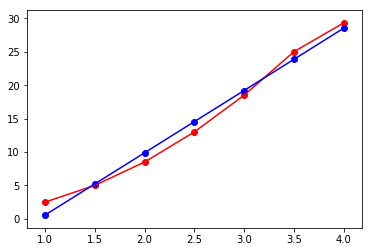

In [14]:
import matplotlib.pyplot as plt
plt.plot(Xa[:,0],d,'r') # Xa x d (vermelho)
plt.scatter(Xa[:,0],d,c='r')
plt.plot(Xa[:,0],Y,'b') # Xa x Y (azul)
plt.scatter(Xa[:,0],Y,c='b')
plt.show()

### Utilizando Outras Parametrizações

#### Quadrática X<sup>2</sup>*teta2+X*teta1+teta0

Nesse caso adicionaremos uma coluna a esquerda do Xa obtido em a) contendo os valores da coluna inicial ao quadrado.

In [15]:
Xb = np.c_[Xa[:,0].transpose()**2, Xa]
Xb

array([[  1.  ,   1.  ,   1.  ],
       [  2.25,   1.5 ,   1.  ],
       [  4.  ,   2.  ,   1.  ],
       [  6.25,   2.5 ,   1.  ],
       [  9.  ,   3.  ,   1.  ],
       [ 12.25,   3.5 ,   1.  ],
       [ 16.  ,   4.  ,   1.  ]])

Agora acharemos a matriz com os valores de teta2, teta1 e teta0.

In [16]:
teta = np.linalg.pinv(Xb)@d
teta

array([ 1.24285714,  3.10428571, -2.22571429])

Agora a nossa predição Y tem o valor:

In [17]:
Y= Xb@teta
Y

array([  2.12142857,   5.22714286,   8.95428571,  13.30285714,
        18.27285714,  23.86428571,  30.07714286])

Plotando o gráfico de Xb x d e Xb x Y temos:

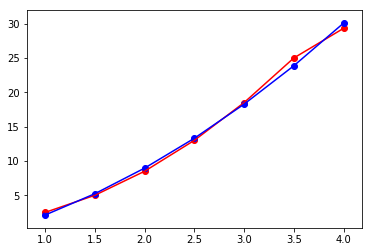

In [18]:
plt.plot(Xb[:,1],d,'r') # Xa x d (vermelho)
plt.scatter(Xb[:,1],d,c='r')
plt.plot(Xb[:,1],Y,'b') # Xa x Y (azul)
plt.scatter(Xb[:,1],Y,c='b')
plt.show()

#### y(k) = teta1*exp(x)+teta2*sen(x)+teta0

In [19]:
Xb = np.c_[(np.exp(Xa[:,0])).transpose(), (np.sin(Xa[:,0])).transpose(), Xa[:,1]]
Xb

array([[  2.71828183,   0.84147098,   1.        ],
       [  4.48168907,   0.99749499,   1.        ],
       [  7.3890561 ,   0.90929743,   1.        ],
       [ 12.18249396,   0.59847214,   1.        ],
       [ 20.08553692,   0.14112001,   1.        ],
       [ 33.11545196,  -0.35078323,   1.        ],
       [ 54.59815003,  -0.7568025 ,   1.        ]])

In [20]:
teta = np.linalg.pinv(Xb)@d
teta

array([  0.07853873, -12.336487  ,  17.23073695])

In [21]:
Y= Xb@teta
Y

array([  7.0634315 ,   5.2771392 ,   6.59352817,  10.80449077,
        17.06730443,  24.15901532,  30.85509063])

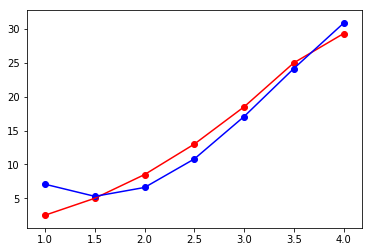

In [26]:
plt.plot(Xa[:,0],d,'r') # Xa x d (vermelho)
plt.scatter(Xa[:,0],d,c='r')
plt.plot(Xa[:,0],Y,'b') # Xa x Y (azul)
plt.scatter(Xa[:,0],Y,c='b')
plt.show()

#### y(k) = exp(teta1*x)+teta0

#### y(1) = teta1*x(1)^2+teta2*x(2)+teta0